# Random Systems : Card Trick Case 1&2



## Nneka Maureen Okolo

## 29/12/2018


In [25]:
import numpy as np

import itertools

import random

import collections

import matplotlib.pyplot as plt

# Analysis:

We want to check the probability of a Magician winning by:

* Performing a 3-Riffle Shuffle then selecting the top Card and placing it in the middle
* Randomly placing a random card in a deck and performing a 3-Riffle Shuffle


# Tools

* Define a function to compute the number of rising sequences in an array

In [26]:
def Rising_Seq(Array):
    
    #Parameters
    N = len(Array)                                   #The length of the array
    C = []                                           #Initialise a list to collect the ordered sequences
    count = 0                                        #Initialise a count of the number of rising sequences
    
    #1. Create a for loop to go over each element of the array
    for i in range(N):
        CardI = Array[i]+1                           #for a Card number in the array comput CardI = Card number + 1
        j = i
        if Array[i] not in C:                        #Check that Card number is not already in the list
            C.append(Array[i])
            while CardI in Array[j+1:N] and j<N:     #Check that CardI is after the Card number in the array then append
                C.append(CardI)
                if CardI in Array:
                    j = list(Array).index(CardI)     #Obtain the position of CardI
                else:
                    j = N
                CardI+=1                             #With reference to the position of CardI compute the next Card number
            count += 1                               #Count after a sequence has been recorded
            
    #Result = print('Number of Rising Sequences: ',count,'\n\nRising Sequences:\n',C)
    return count                                     #Return the count which is the number of rising sequences.

* Define a function to compute N riffle shuffles of an array

In [27]:
#Define a riffle shuffle

def Riffle_Shuffle(Array, N):
    
    #Parameters
    NT = len(Array)                                  #The length of the array
    NS = N                                           #Number of required Riffle shuffles on the array
    i = 0                                            #Initialise the number of Riffle shuffles
    
    
    #1. Create a while loop to run a riffle shuffle on the same array.
    while i < NS:
        
        if NT%2 == 0:                                #If the length of the array is even
            cut = NT//2                              #Divide the array into two equal parts
            A = Array[0:cut]                         #Assign the first half of the array to A
            B = Array[cut: NT]                       #Assign the second half of the array to B
            E = np.random.randint(0,2)               #Include randomness to reduce the likeliness of the top or
                                                     #bottom cards being in the same position
            if E == 0:
                Array = np.empty((A.size + B.size,), dtype=int)
                Array[0::2] = A
                Array[1::2] = B
            if E == 1:
                Array = np.empty((A.size + B.size,), dtype=int)
                Array[1::2] = A
                Array[0::2] = B
                
        if NT%2 == 1:                                #If the length of the array is odd
            cut = NT//2 + 1                          #Divide the array into two unequal parts
            E = np.random.randint(0,2)               #Include randomness to reduce the likeliness of the top or bottom
                                                     #unequal Cards being in the same position
                
            if E == 0:
                A = Array[0:cut]                     #Assign the larger half of the array to A
                B = Array[cut: NT]                   #Assign the smaller half of the array to B
                Array = np.empty((A.size + B.size,), dtype=int)
                Array[0::2] = A
                Array[1::2] = B 
            if E == 1:
                A = Array[0:cut-1]                   #Assign the smaller half of the array to A
                B = Array[cut-1: NT]                 #Assign the larger half of the array to B
                Array = np.empty((A.size + B.size,), dtype=int)
                Array[0::2] = B
                Array[1::2] = A
        i+=1                                         #increase the counter till NS Riffle Shuffles are complete
        
    return Array                                     #Return the shuffled array                                    

* Define the Deck of cards

In [28]:
#Parameters

N = int(input('Number of cards in a deck: '))        #Number of Cards in a Deck
Cards = np.arange(1,N+1)                             #Initialise a deck with N cards


Number of cards in a deck: 52


In [29]:
#To obtain all Permutations of the deck of Cards

#Cards_Iterations = list(itertools.permutations(Cards))
#Cards_Iterations

## Case 1:

Perform a 3-Riffle Shuffle, selecting the top Card and place it in the middle

### Step 1:
Perform a 3-Riffle Shuffle on an ordered deck of 52 cards

In [36]:
Cards_Shuffle = Riffle_Shuffle(Cards,3)
Cards_Shuffle

array([ 7, 27, 20, 40, 34,  1, 47, 14,  8, 28, 21, 41, 35,  2, 48, 15,  9,
       29, 22, 42, 36,  3, 49, 16, 10, 30, 23, 43, 37,  4, 50, 17, 11, 31,
       24, 44, 38,  5, 51, 18, 12, 32, 25, 45, 39,  6, 52, 19, 13, 33, 26,
       46])

* Check the number of rising sequences

In [37]:
n = Rising_Seq(Cards_Shuffle)
n

8

### Step 2

Place the top card in 52 possible position of shuffled cards:

**Assumption**:

The magician is not looking

In [38]:
Possible_Cards_Replace = []                         #Initialise a list with the number of possible positions of
                                                    #the top card

Possible_Cards_Replace.append(Cards_Shuffle)        #Include the initial shuffle as a possibility

for i in range(1,N):
    
    Cards_Replace = np.empty(N, dtype = int)        #Initialise a set for 52-1 possible positions of the top card
    
    #Assign parts of the set with respect to the possible position of the top card
    Cards_Replace[0:i] = Cards_Shuffle[1:i+1]
    Cards_Replace[i] = Cards_Shuffle[0]
    Cards_Replace[i+1:N] = Cards_Shuffle[i+1:N]
    
    #Add the outcome to the list
    Possible_Cards_Replace.append(Cards_Replace)
    
#Possible_Cards_Replace

### Step 3

Check that the number of rising sequences in each replacement is at most r+1 = 9

In [39]:
RSEQ = np.arange(N)                                #Initialise a set of the number of rising sequences for each array in
                                                   #Possible_Cards_Replace
    
#Create a for loop to compute the number of rising sequences in each array of Possible_Cards_Replace
for i in range(N):
    RSEQ[i] = Rising_Seq(Possible_Cards_Replace[i])
RSEQ    

array([8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8,
       8, 8, 8, 8, 8, 8])

### Step 4

Determine the probability of the magician wining with this technique i.e the probability of obtaining exactly 9 rising sequences

In [40]:
Count = collections.Counter(RSEQ)               #Count the number of occurences of 8 and 9
Count

Counter({8: 15, 9: 37})

In [41]:
Probability = Count[9]/N                        #Compute the probability of obtaining 9 rising sequences
                                                #P = (Number of outcomes)/(Number of possible outcomes)
Probability

0.7115384615384616

## Observation

* It is observed from a number of tests that the probability of a magician winning a round of the trick is could be in the interval [0.71,0.82]

* Also, it is observed that the magician less likely to select the right card if the card is placed towards the begining or towards the end of the deck


**Note**:
The computer simulations for the random interleave is not totally random as the only case considered here is when there is a single card in between two cards

# Case 2

Randomly place a random card in a deck and perform a 3-Riffle Shuffle

### Step 1

Randomly pick a card and place in the deck of cards

Assume card #20 was picked

In [42]:
t = list(Cards).index(20)                                 #Obtain the position of the selected card in the ordered deck

Possible_Cards_Replace2 = []                              #Initialise a list to compute the number of possible positions
                                                          #of the card
    
Cards_Replace2 = np.empty(N, dtype = int)                 #Initialise the set for the location of the card at the first
                                                          #position
    
#Assign parts of the set with the selected card at the top position.
Cards_Replace2[0] = Cards[t]
Cards_Replace2[1:t+1] = Cards[0:t]
Cards_Replace2[t+1:N] = Cards[t+1:N]

#Add the first set to the list
Possible_Cards_Replace2.append(Cards_Replace2)

for i in range(1,N):
    
    Cards_Replace3 = np.empty(N, dtype = int)             #Initialise the set for the location of the card across 52-1
                                                          #possible positions
        
    #Assign parts of the set with respect to the possible position of the now top card
    Cards_Replace3[0:i] = Cards_Replace2[1:i+1]
    Cards_Replace3[i] = Cards_Replace2[0]
    Cards_Replace3[i+1:N] = Cards_Replace2[i+1:N]
    
    #Add the possibilities to the list
    Possible_Cards_Replace2.append(Cards_Replace3)
    
#Possible_Cards_Replace2

### Step 2

Perform a Riffle Shuffle on the deck of cards for each possible position

In [43]:
Card_Shuffle2 = []
for i in range(N):
    Card_Shuffle2.append(Riffle_Shuffle(Possible_Cards_Replace2[i],3))

#Card_Shuffle2

### Step 3

Check that the number of rising sequences in the 3-Riffle Shuffle is 9

In [44]:
RSEQ2 = np.arange(N)                                #Initialise a set of the number of rising sequences for each array in
                                                    #Card_Shuffle2

#Create a for loop to compute the number of rising sequences in each array of Card_Shuffle2
for i in range(N):
    RSEQ2[i] = Rising_Seq(Card_Shuffle2[i])
RSEQ2    

array([8, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 8, 9, 9, 9,
       9, 9, 8, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 8, 9,
       9, 9, 9, 9, 9, 9])

### Step 4

Determine the Probability of the magician winning using this method

In [45]:
Count = collections.Counter(RSEQ2)                  #Count the number of times 8 and 9 occur
Count

Counter({8: 8, 9: 44})

In [46]:
Probability2 = Count[9]/N                           #Compute the probability of obtaining 9 rising sequences
                                                    #P = (Number of outcomes)/(Number of possible outcomes)
Probability2

0.8461538461538461

## Observation:

It is observed that:

* By randomly placing the selected card and doing a 3-Riffle Shuffle, a magician has a higher probability of winning the game.

* Also, the magician is less likely to guess the card that was picked if the card was placed at the end or begining.

**Note**:
The computer simulations for the random interleave is not totally random as the only case considered here is when there is a single card in between two cards

Before we conclude, it is useful to determine if the 9 rising sequences observed from each test is good enough for a magician to guess the card chosen

That is, if the 9 rising sequences composes of eight rising sequences of at least two cards and a single rising sequence. For this, we will consider from each case 5 possibilities whose rising sequences are 9.


Redefine the Rising Sequence function to give relevant output

In [47]:
def Rising_Seq(Array):
    
    #Parameters
    N = len(Array)                                   #The length of the array
    C = []                                           #Initialise a list to collect the ordered sequences
    count = 0                                        #Initialise a count of the number of rising sequences
    
    #1. Create a for loop to go over each element of the array
    for i in range(N):
        CardI = Array[i]+1                           #for a Card number in the array comput CardI = Card number + 1
        j = i
        if Array[i] not in C:                        #Check that Card number is not already in the list
            C.append(Array[i])
            while CardI in Array[j+1:N] and j<N:     #Check that CardI is after the Card number in the array then append
                C.append(CardI)
                if CardI in Array:
                    j = list(Array).index(CardI)     #Obtain the position of CardI
                else:
                    j = N
                CardI+=1                             #With reference to the position of CardI compute the next Card number
            count += 1                               #Count after a sequence has been recorded
            
    Result = print('Number of Rising Sequences: ',count,'\n\nRising Sequences:\n',C)
                
    return Result                                    #Return the count and rising sequences.

## Test 1:

Recall the top card in **Step 1**, **Case 1**

In [54]:
Possible_Cards_Replace[9:14]

[array([27, 20, 40, 34,  1, 47, 14,  8, 28,  7, 21, 41, 35,  2, 48, 15,  9,
        29, 22, 42, 36,  3, 49, 16, 10, 30, 23, 43, 37,  4, 50, 17, 11, 31,
        24, 44, 38,  5, 51, 18, 12, 32, 25, 45, 39,  6, 52, 19, 13, 33, 26,
        46]),
 array([27, 20, 40, 34,  1, 47, 14,  8, 28, 21,  7, 41, 35,  2, 48, 15,  9,
        29, 22, 42, 36,  3, 49, 16, 10, 30, 23, 43, 37,  4, 50, 17, 11, 31,
        24, 44, 38,  5, 51, 18, 12, 32, 25, 45, 39,  6, 52, 19, 13, 33, 26,
        46]),
 array([27, 20, 40, 34,  1, 47, 14,  8, 28, 21, 41,  7, 35,  2, 48, 15,  9,
        29, 22, 42, 36,  3, 49, 16, 10, 30, 23, 43, 37,  4, 50, 17, 11, 31,
        24, 44, 38,  5, 51, 18, 12, 32, 25, 45, 39,  6, 52, 19, 13, 33, 26,
        46]),
 array([27, 20, 40, 34,  1, 47, 14,  8, 28, 21, 41, 35,  7,  2, 48, 15,  9,
        29, 22, 42, 36,  3, 49, 16, 10, 30, 23, 43, 37,  4, 50, 17, 11, 31,
        24, 44, 38,  5, 51, 18, 12, 32, 25, 45, 39,  6, 52, 19, 13, 33, 26,
        46]),
 array([27, 20, 40, 34,  1, 47, 

Ananlyse the Rising Sequences in each case

In [55]:
for i in range(5):
    Rising_Seq(Possible_Cards_Replace[9+i])

Number of Rising Sequences:  9 

Rising Sequences:
 [27, 28, 29, 30, 31, 32, 33, 20, 21, 22, 23, 24, 25, 26, 40, 41, 42, 43, 44, 45, 46, 34, 35, 36, 37, 38, 39, 1, 2, 3, 4, 5, 6, 47, 48, 49, 50, 51, 52, 14, 15, 16, 17, 18, 19, 8, 9, 10, 11, 12, 13, 7]
Number of Rising Sequences:  9 

Rising Sequences:
 [27, 28, 29, 30, 31, 32, 33, 20, 21, 22, 23, 24, 25, 26, 40, 41, 42, 43, 44, 45, 46, 34, 35, 36, 37, 38, 39, 1, 2, 3, 4, 5, 6, 47, 48, 49, 50, 51, 52, 14, 15, 16, 17, 18, 19, 8, 9, 10, 11, 12, 13, 7]
Number of Rising Sequences:  9 

Rising Sequences:
 [27, 28, 29, 30, 31, 32, 33, 20, 21, 22, 23, 24, 25, 26, 40, 41, 42, 43, 44, 45, 46, 34, 35, 36, 37, 38, 39, 1, 2, 3, 4, 5, 6, 47, 48, 49, 50, 51, 52, 14, 15, 16, 17, 18, 19, 8, 9, 10, 11, 12, 13, 7]
Number of Rising Sequences:  9 

Rising Sequences:
 [27, 28, 29, 30, 31, 32, 33, 20, 21, 22, 23, 24, 25, 26, 40, 41, 42, 43, 44, 45, 46, 34, 35, 36, 37, 38, 39, 1, 2, 3, 4, 5, 6, 47, 48, 49, 50, 51, 52, 14, 15, 16, 17, 18, 19, 8, 9, 10, 11, 12,

## Observation

Notice that in each array there is only one single rising sequence which makes it is easier for the magician to determine the selected card from the shuffled deck.

## Test 2

Recall the selected card in **Step 1**, **Case 2**

In [50]:
Card_Shuffle2[1:6]

[array([ 1, 33, 13, 46, 27,  7, 40, 21, 20, 34, 14, 47, 28,  8, 41, 22,  2,
        35, 15, 48, 29,  9, 42, 23,  3, 36, 16, 49, 30, 10, 43, 24,  4, 37,
        17, 50, 31, 11, 44, 25,  5, 38, 18, 51, 32, 12, 45, 26,  6, 39, 19,
        52]),
 array([13, 46,  1, 33, 40, 21, 27,  7, 14, 47,  2, 34, 41, 22, 28,  8, 15,
        48, 20, 35, 42, 23, 29,  9, 16, 49,  3, 36, 43, 24, 30, 10, 17, 50,
         4, 37, 44, 25, 31, 11, 18, 51,  5, 38, 45, 26, 32, 12, 19, 52,  6,
        39]),
 array([40, 19, 27,  6, 13, 47,  1, 34, 41, 21, 28,  7, 14, 48,  2, 35, 42,
        22, 29,  8, 15, 49,  3, 36, 43, 23, 30,  9, 16, 50, 20, 37, 44, 24,
        31, 10, 17, 51,  4, 38, 45, 25, 32, 11, 18, 52,  5, 39, 46, 26, 33,
        12]),
 array([46, 13, 33,  1, 21, 40,  7, 27, 47, 14, 34,  2, 22, 41,  8, 28, 48,
        15, 35,  3, 23, 42,  9, 29, 49, 16, 36,  4, 24, 43, 10, 30, 50, 17,
        37, 20, 25, 44, 11, 31, 51, 18, 38,  5, 26, 45, 12, 32, 52, 19, 39,
         6]),
 array([40, 19, 27,  6, 13, 47, 

Analyse the Rising sequences

In [52]:
for i in range(5):
    Rising_Seq(Card_Shuffle2[1+i])

Number of Rising Sequences:  9 

Rising Sequences:
 [1, 2, 3, 4, 5, 6, 33, 34, 35, 36, 37, 38, 39, 13, 14, 15, 16, 17, 18, 19, 46, 47, 48, 49, 50, 51, 52, 27, 28, 29, 30, 31, 32, 7, 8, 9, 10, 11, 12, 40, 41, 42, 43, 44, 45, 21, 22, 23, 24, 25, 26, 20]
Number of Rising Sequences:  9 

Rising Sequences:
 [13, 14, 15, 16, 17, 18, 19, 46, 47, 48, 49, 50, 51, 52, 1, 2, 3, 4, 5, 6, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 7, 8, 9, 10, 11, 12, 20]
Number of Rising Sequences:  9 

Rising Sequences:
 [40, 41, 42, 43, 44, 45, 46, 19, 20, 27, 28, 29, 30, 31, 32, 33, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 47, 48, 49, 50, 51, 52, 1, 2, 3, 4, 5, 34, 35, 36, 37, 38, 39, 21, 22, 23, 24, 25, 26]
Number of Rising Sequences:  9 

Rising Sequences:
 [46, 47, 48, 49, 50, 51, 52, 13, 14, 15, 16, 17, 18, 19, 33, 34, 35, 36, 37, 38, 39, 1, 2, 3, 4, 5, 6, 21, 22, 23, 24, 25, 26, 40, 41, 42, 43, 44, 45, 7, 8, 9, 10, 11, 12, 27, 28, 29, 30, 31, 

## Observation

Notice that in almost all arrays there are at least two rising sequences which makes it difficult to guess which card was selected from the ordered deck.

# Conclusion

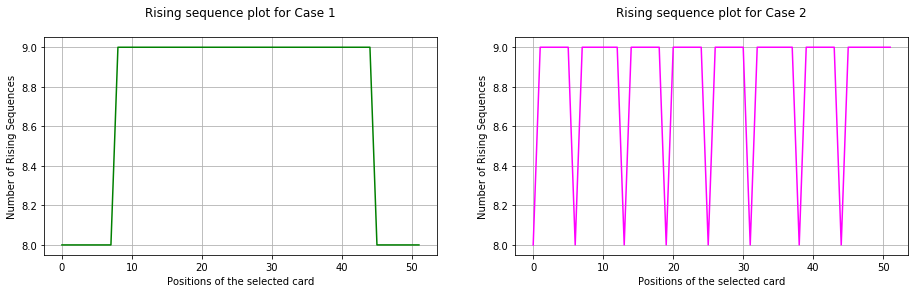

In [53]:
plt.subplot(1,2,1)
plt.plot(RSEQ,'green')
plt.xlabel('Positions of the selected card')
plt.ylabel('Number of Rising Sequences')
plt.title('Rising sequence plot for Case 1\n')
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(RSEQ2, 'magenta')
plt.xlabel('Positions of the selected card')
plt.ylabel('Number of Rising Sequences')
plt.title('Rising sequence plot for Case 2\n')
plt.grid(True)
plt.subplots_adjust(left=0.5,right=2.5)
plt.show()

From the Observations recorded in the report and with the last test, it is conclusive that a Magician who chooses to perform a 3 riffle shuffle then replacement of the top card has lower probability of picking the right card than a Magician who allows replacement of a randomly selected card before the 3-riffle shuffle.

However, the test and the above graph of the Rising sequences obtained from both cases shows that although the probability of picking the right card in the first case is less, a Magician is more likely to select the right card under some conditions than with the case with the higher probability which depends mostly on a lucky guess between the selected card and another card as shown in the above example.